# INTERNPE INTERNSHIP, OCTOBER 2023

# ARTIFICIAL INTELLIGENCE AND MACHINE LEARNING INTERNSHIP

## PROBLEM STATEMENT

### Make a Diabetes Prediction with ML

## SOLUTION

## AUTHOR : ARITRA BAG

#### MOUNTING DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### IMPORTING LIBRARIES

In [2]:
!pip install keras_tuner
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import seaborn as sns
import sklearn
import keras_tuner
import gradio as gr

Using TensorFlow backend


#### IMPORTING THE DATASET

In [4]:
#Reading dataset from a .CSV file directly
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects for Show/InternPe/Diabetes/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### EXPLORATORY ANALYSIS OF THE RAW DATA

In [5]:
print('\nThe number of null values in the dataset is : \n' + str(dataset.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(dataset.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(dataset.info())
print('\nThe data distribution in the columns is given by :\n')
print(dataset.describe())
print('\nThe number of unique values in the Pregnancies column is : ' + str(len(dataset['Pregnancies'].unique())))
print('\nThe number of unique values in the Glucose column is : ' + str(len(dataset['Glucose'].unique())))
print('\nThe number of unique values in the BloodPressure column is : ' + str(len(dataset['BloodPressure'].unique())))
print('\nThe number of unique values in the SkinThickness column is : ' + str(len(dataset['SkinThickness'].unique())))
print('\nThe number of unique values in the Insulin column is : ' + str(len(dataset['Insulin'].unique())))
print('\nThe number of unique values in the BMI column is : ' + str(len(dataset['BMI'].unique())))
print('\nThe number of unique values in the DiabetesPedigreeFunction column is : ' + str(len(dataset['DiabetesPedigreeFunction'].unique())))
print('\nThe number of unique values in the Age column is : ' + str(len(dataset['Age'].unique())))
print('\nThe number of unique values in the Outcome column is : ' + str(len(dataset['Outcome'].unique())))


The number of null values in the dataset is : 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction 

In [6]:
print('\nThe number of 0 values in the Glucose column is : ' + str((dataset['Glucose']== 0).sum()))
print('\nThe number of 0 values in the BloodPressure column is : ' + str((dataset['BloodPressure']== 0).sum()))
print('\nThe number of 0 values in the SkinThickness column is : ' + str((dataset['SkinThickness']== 0).sum()))
print('\nThe number of 0 values in the Insulin column is : ' + str((dataset['Insulin']== 0).sum()))
print('\nThe number of 0 values in the BMI column is : ' + str((dataset['BMI']== 0).sum()))
print('\nThe number of 0 values in the DiabetesPedigreeFunction column is : ' + str((dataset['DiabetesPedigreeFunction']== 0).sum()))
print('\nThe number of 0 values in the Age column is : ' + str((dataset['Age']== 0).sum()))


The number of 0 values in the Glucose column is : 5

The number of 0 values in the BloodPressure column is : 35

The number of 0 values in the SkinThickness column is : 227

The number of 0 values in the Insulin column is : 374

The number of 0 values in the BMI column is : 11

The number of 0 values in the DiabetesPedigreeFunction column is : 0

The number of 0 values in the Age column is : 0


#### DATA PREPROCESSING

In [7]:
#replacing 0 Glucose Values in the dataset with the column mean value
dataset['Glucose'] = dataset['Glucose'].replace(0,dataset['Glucose'].mean())

#replacing 0 Blood Pressure Values in the dataset with the column mean value
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0,dataset['BloodPressure'].mean())

#replacing 0 Skin Thickness Values in the dataset with the column mean value
dataset['SkinThickness'] = dataset['Glucose'].replace(0,dataset['SkinThickness'].mean())

#replacing 0 BMI Values in the dataset with the column mean value
dataset['BMI'] = dataset['BMI'].replace(0,dataset['BMI'].mean())

#### EXPLORATORY ANALYSIS OF THE PROCESSED DATA

In [8]:
print('\nThe number of null values in the dataset is : \n' + str(dataset.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(dataset.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(dataset.info())
print('\nThe data distribution in the columns is given by :\n')
print(dataset.describe())
print('\nThe number of unique values in the Pregnancies column is : ' + str(len(dataset['Pregnancies'].unique())))
print('\nThe number of unique values in the Glucose column is : ' + str(len(dataset['Glucose'].unique())))
print('\nThe number of unique values in the BloodPressure column is : ' + str(len(dataset['BloodPressure'].unique())))
print('\nThe number of unique values in the SkinThickness column is : ' + str(len(dataset['SkinThickness'].unique())))
print('\nThe number of unique values in the Insulin column is : ' + str(len(dataset['Insulin'].unique())))
print('\nThe number of unique values in the BMI column is : ' + str(len(dataset['BMI'].unique())))
print('\nThe number of unique values in the DiabetesPedigreeFunction column is : ' + str(len(dataset['DiabetesPedigreeFunction'].unique())))
print('\nThe number of unique values in the Age column is : ' + str(len(dataset['Age'].unique())))
print('\nThe number of unique values in the Outcome column is : ' + str(len(dataset['Outcome'].unique())))
print('\nThe correlation coefficient between the features is :\n \n' + str(dataset.iloc[:,:].corr()) + '\n\n')


The number of null values in the dataset is : 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction 

In [9]:
print('\nThe number of 0 values in the Glucose column is : ' + str((dataset['Glucose']== 0).sum()))
print('\nThe number of 0 values in the BloodPressure column is : ' + str((dataset['BloodPressure']== 0).sum()))
print('\nThe number of 0 values in the SkinThickness column is : ' + str((dataset['SkinThickness']== 0).sum()))
print('\nThe number of 0 values in the Insulin column is : ' + str((dataset['Insulin']== 0).sum()))
print('\nThe number of 0 values in the BMI column is : ' + str((dataset['BMI']== 0).sum()))
print('\nThe number of 0 values in the DiabetesPedigreeFunction column is : ' + str((dataset['DiabetesPedigreeFunction']== 0).sum()))
print('\nThe number of 0 values in the Age column is : ' + str((dataset['Age']== 0).sum()))


The number of 0 values in the Glucose column is : 0

The number of 0 values in the BloodPressure column is : 0

The number of 0 values in the SkinThickness column is : 0

The number of 0 values in the Insulin column is : 374

The number of 0 values in the BMI column is : 0

The number of 0 values in the DiabetesPedigreeFunction column is : 0

The number of 0 values in the Age column is : 0


#### GRAPHICAL REPRESENTATION OF THE PROCESSED DATASET

Text(0.5, 1.0, 'Boxplot for Outcome')

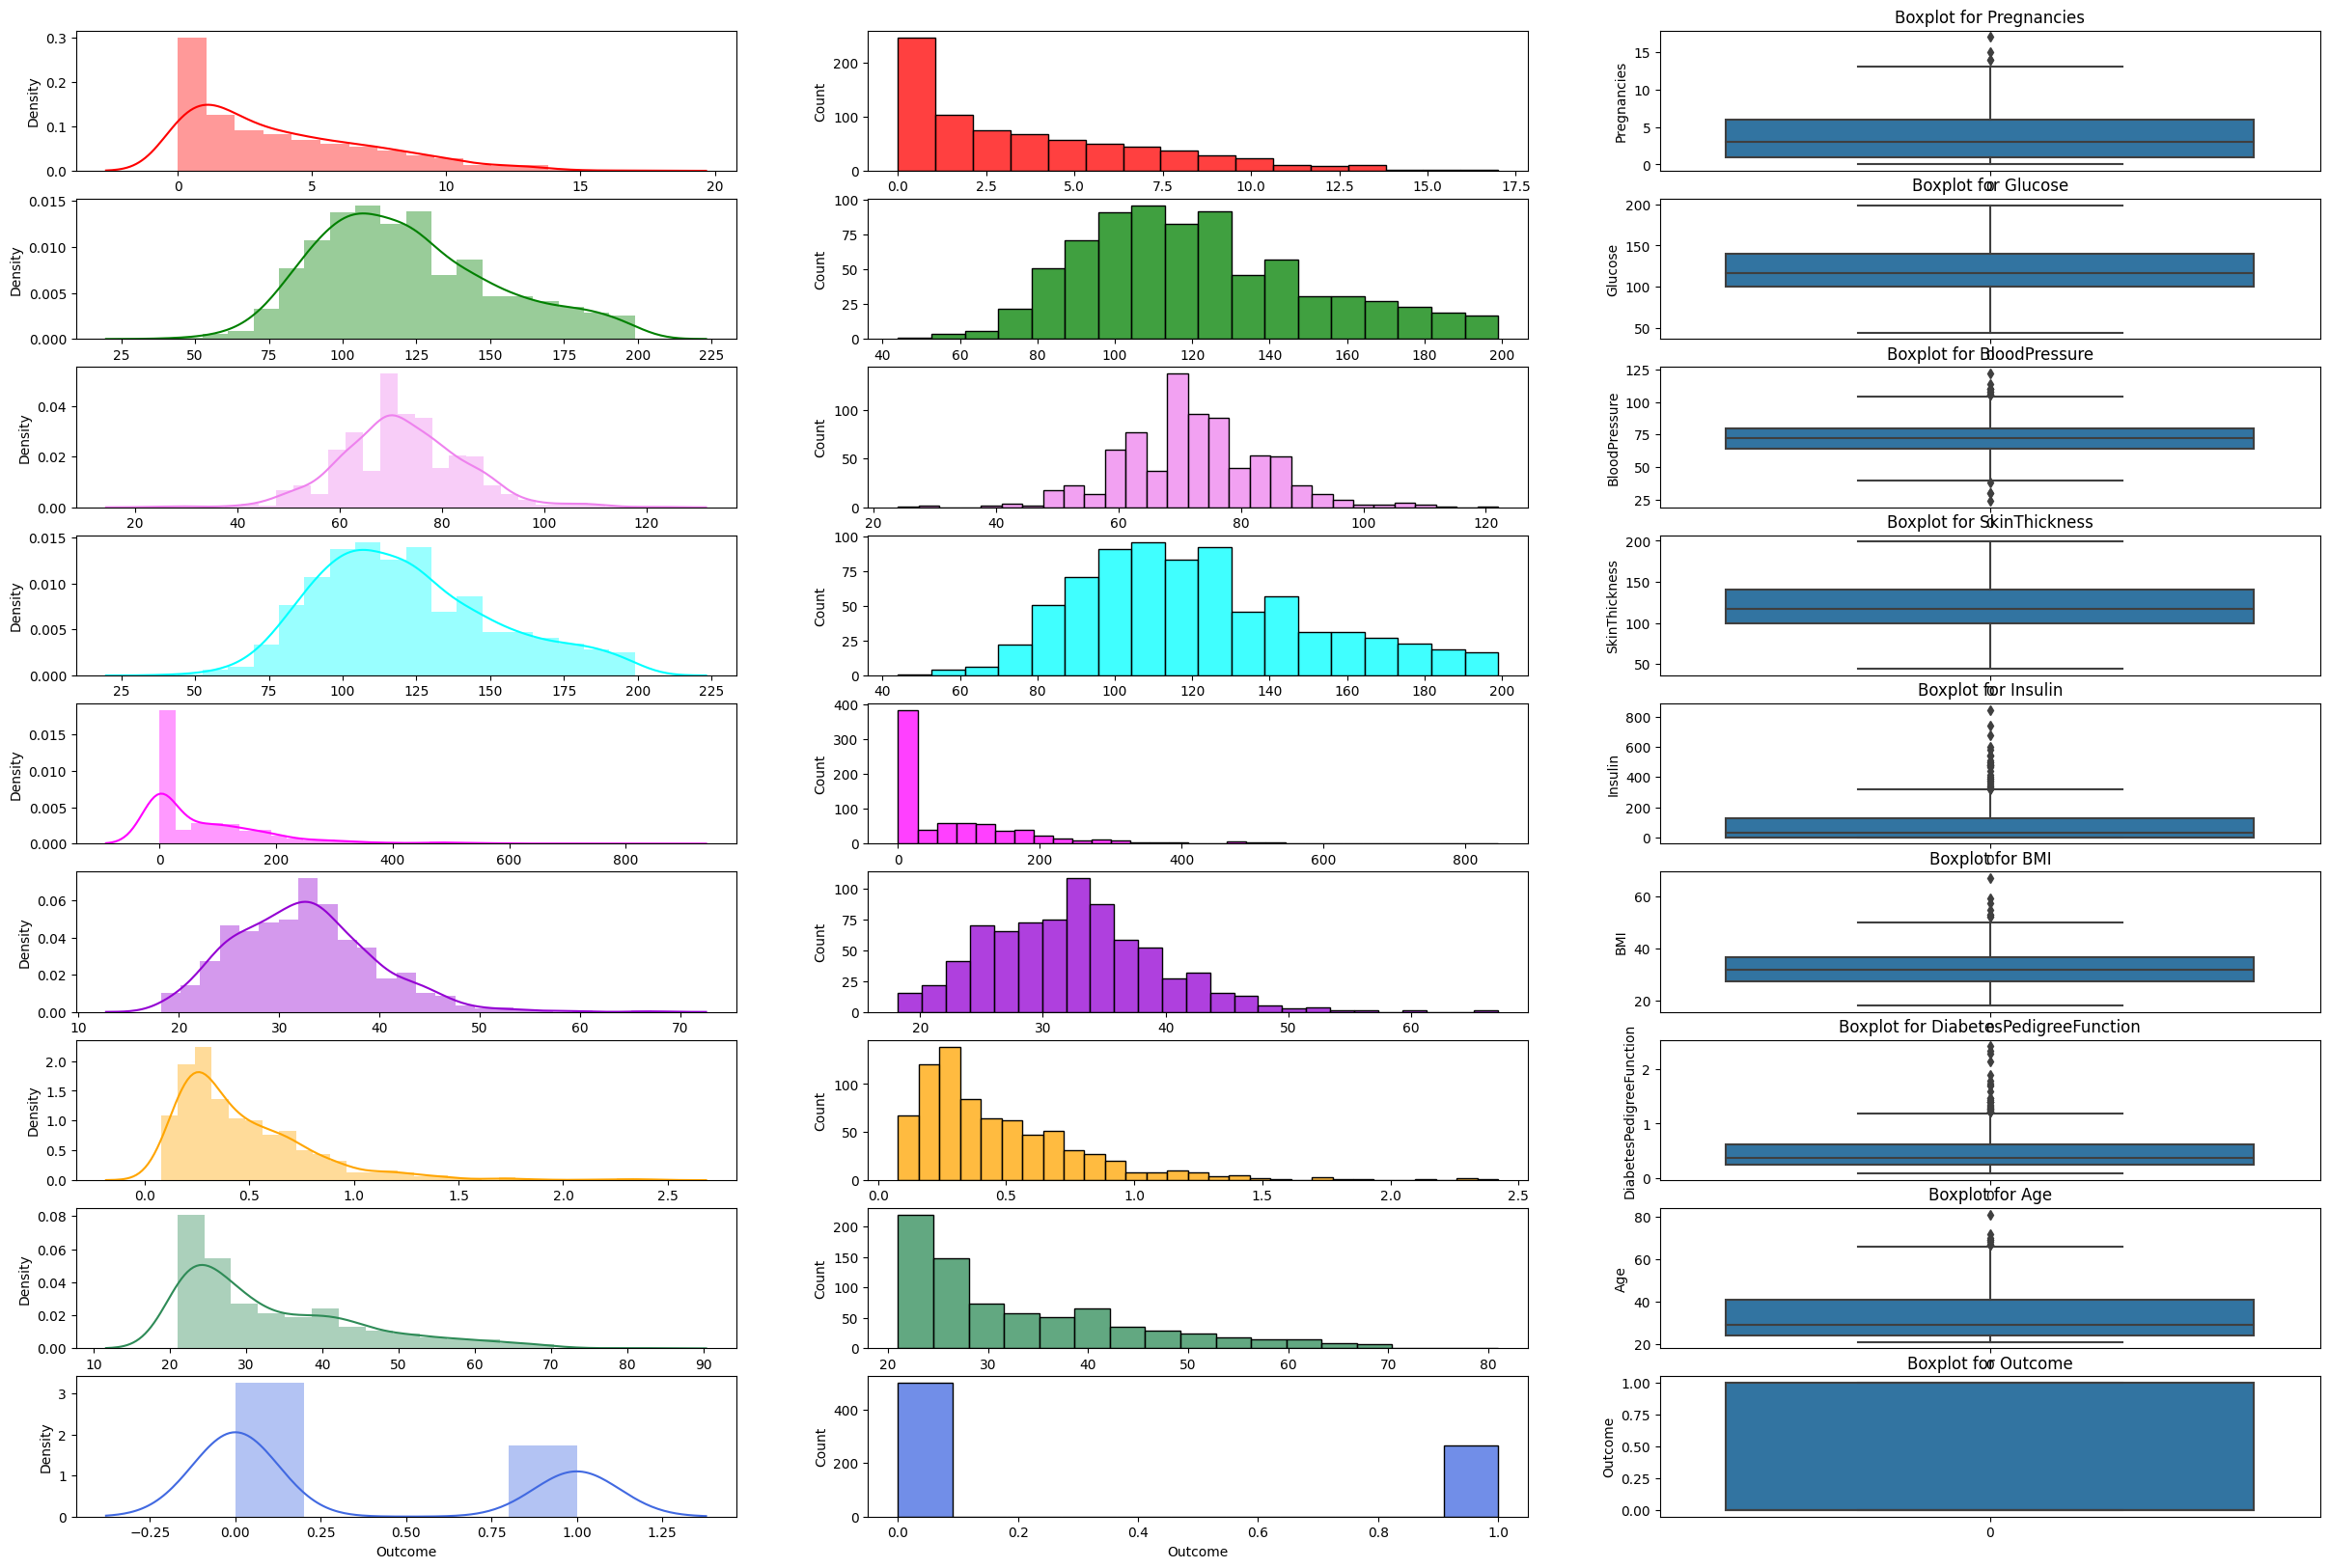

In [10]:
#Data Distribution
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (30,20))
plt.tight_layout(pad = 4.0)

plt.subplot(9,3,1)
sns.distplot(dataset['Pregnancies'],color = 'red')
plt.subplot(9,3,2)
sns.histplot(dataset['Pregnancies'],color = 'red')
plt.subplot(9,3,3)
sns.boxplot(dataset['Pregnancies'])
plt.ylabel('Pregnancies')
plt.title('Boxplot for Pregnancies')

plt.subplot(9,3,4)
sns.distplot(dataset['Glucose'],color = 'green')
plt.subplot(9,3,5)
sns.histplot(dataset['Glucose'],color = 'green')
plt.subplot(9,3,6)
sns.boxplot(dataset['Glucose'])
plt.ylabel('Glucose')
plt.title('Boxplot for Glucose')

plt.subplot(9,3,7)
sns.distplot(dataset['BloodPressure'],color = 'violet')
plt.subplot(9,3,8)
sns.histplot(dataset['BloodPressure'],color = 'violet')
plt.subplot(9,3,9)
sns.boxplot(dataset['BloodPressure'])
plt.ylabel('BloodPressure')
plt.title('Boxplot for BloodPressure')

plt.subplot(9,3,10)
sns.distplot(dataset['SkinThickness'],color = 'cyan')
plt.subplot(9,3,11)
sns.histplot(dataset['SkinThickness'],color = 'cyan')
plt.subplot(9,3,12)
sns.boxplot(dataset['SkinThickness'])
plt.ylabel('SkinThickness')
plt.title('Boxplot for SkinThickness')

plt.subplot(9,3,13)
sns.distplot(dataset['Insulin'],color = 'magenta')
plt.subplot(9,3,14)
sns.histplot(dataset['Insulin'],color = 'magenta')
plt.subplot(9,3,15)
sns.boxplot(dataset['Insulin'])
plt.ylabel('Insulin')
plt.title('Boxplot for Insulin')

plt.subplot(9,3,16)
sns.distplot(dataset['BMI'],color = 'darkviolet')
plt.subplot(9,3,17)
sns.histplot(dataset['BMI'],color = 'darkviolet')
plt.subplot(9,3,18)
sns.boxplot(dataset['BMI'])
plt.ylabel('BMI')
plt.title('Boxplot for BMI')

plt.subplot(9,3,19)
sns.distplot(dataset['DiabetesPedigreeFunction'],color = 'orange')
plt.subplot(9,3,20)
sns.histplot(dataset['DiabetesPedigreeFunction'],color = 'orange')
plt.subplot(9,3,21)
sns.boxplot(dataset['DiabetesPedigreeFunction'])
plt.ylabel('DiabetesPedigreeFunction')
plt.title('Boxplot for DiabetesPedigreeFunction')

plt.subplot(9,3,22)
sns.distplot(dataset['Age'],color = 'seagreen')
plt.subplot(9,3,23)
sns.histplot(dataset['Age'],color = 'seagreen')
plt.subplot(9,3,24)
sns.boxplot(dataset['Age'])
plt.ylabel('Age')
plt.title('Boxplot for Age')

plt.subplot(9,3,25)
sns.distplot(dataset['Outcome'],color = 'royalblue')
plt.subplot(9,3,26)
sns.histplot(dataset['Outcome'],color = 'royalblue')
plt.subplot(9,3,27)
sns.boxplot(dataset['Outcome'])
plt.ylabel('Outcome')
plt.title('Boxplot for Outcome')

<Figure size 3000x2500 with 0 Axes>

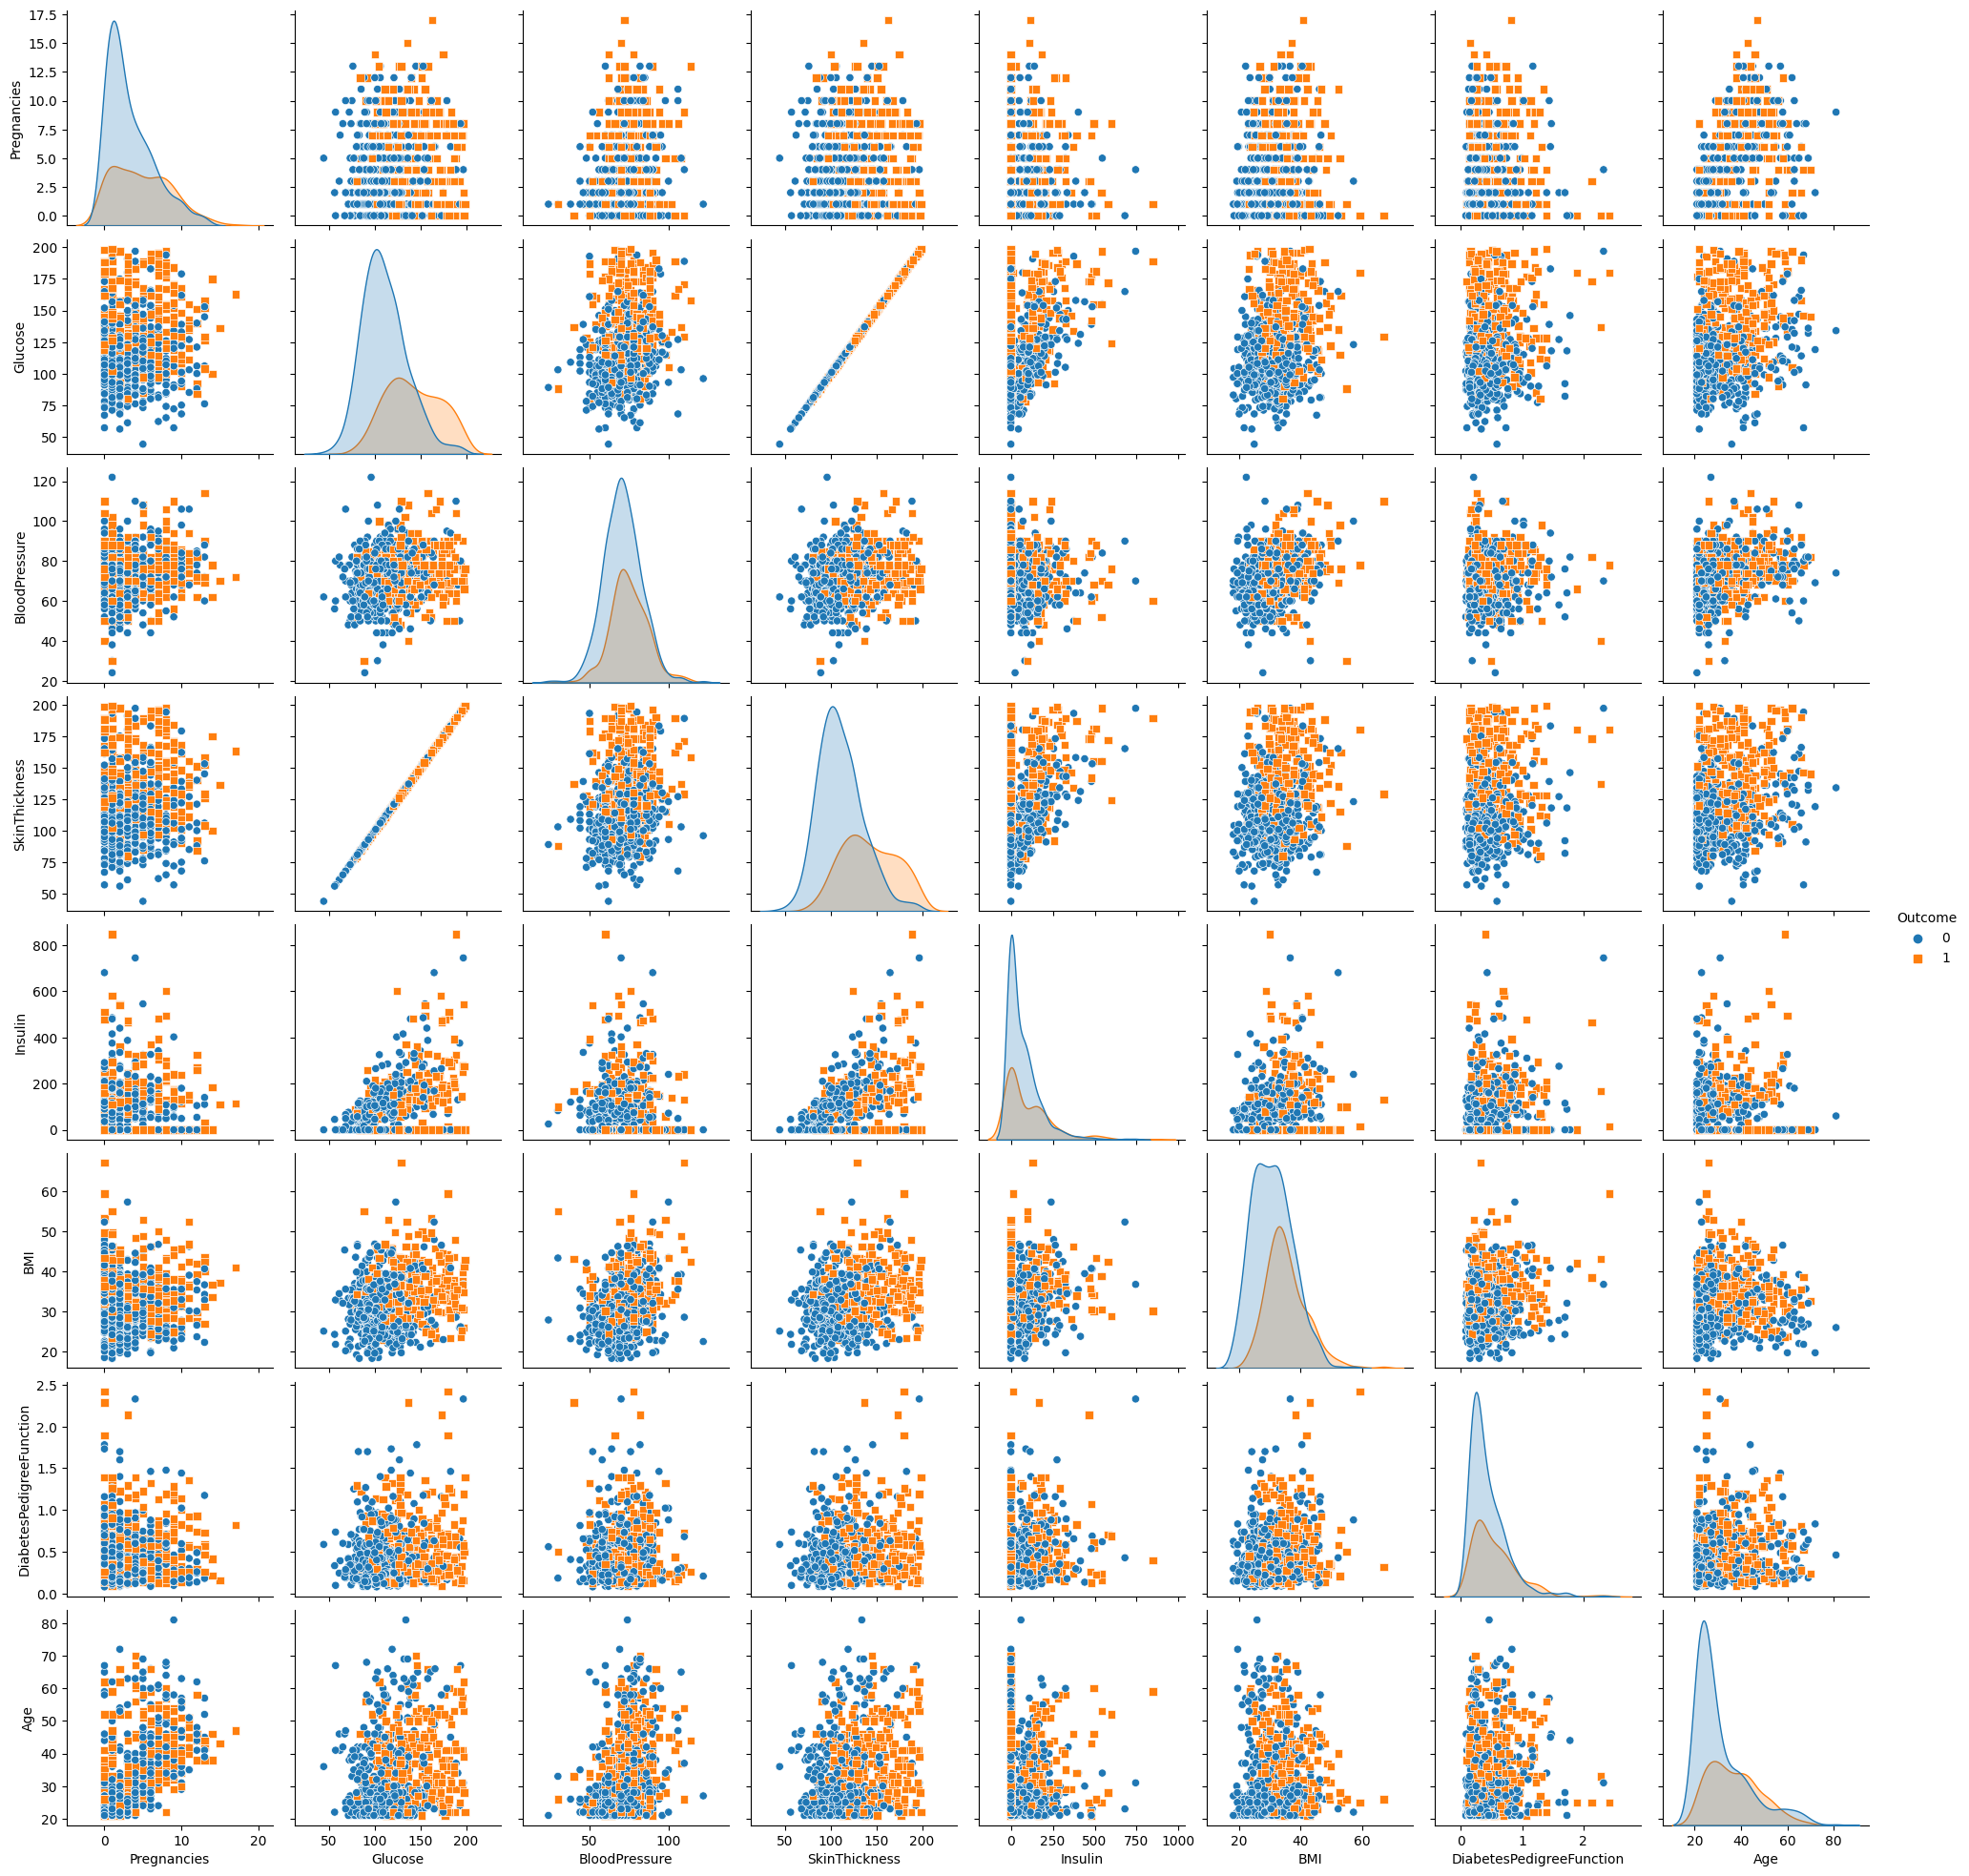

In [11]:
plt.figure(figsize = (30,25))
plt.tight_layout(pad = 3.0)
sns.pairplot(dataset, hue = 'Outcome', markers = ["o", "s"])

<Axes: >

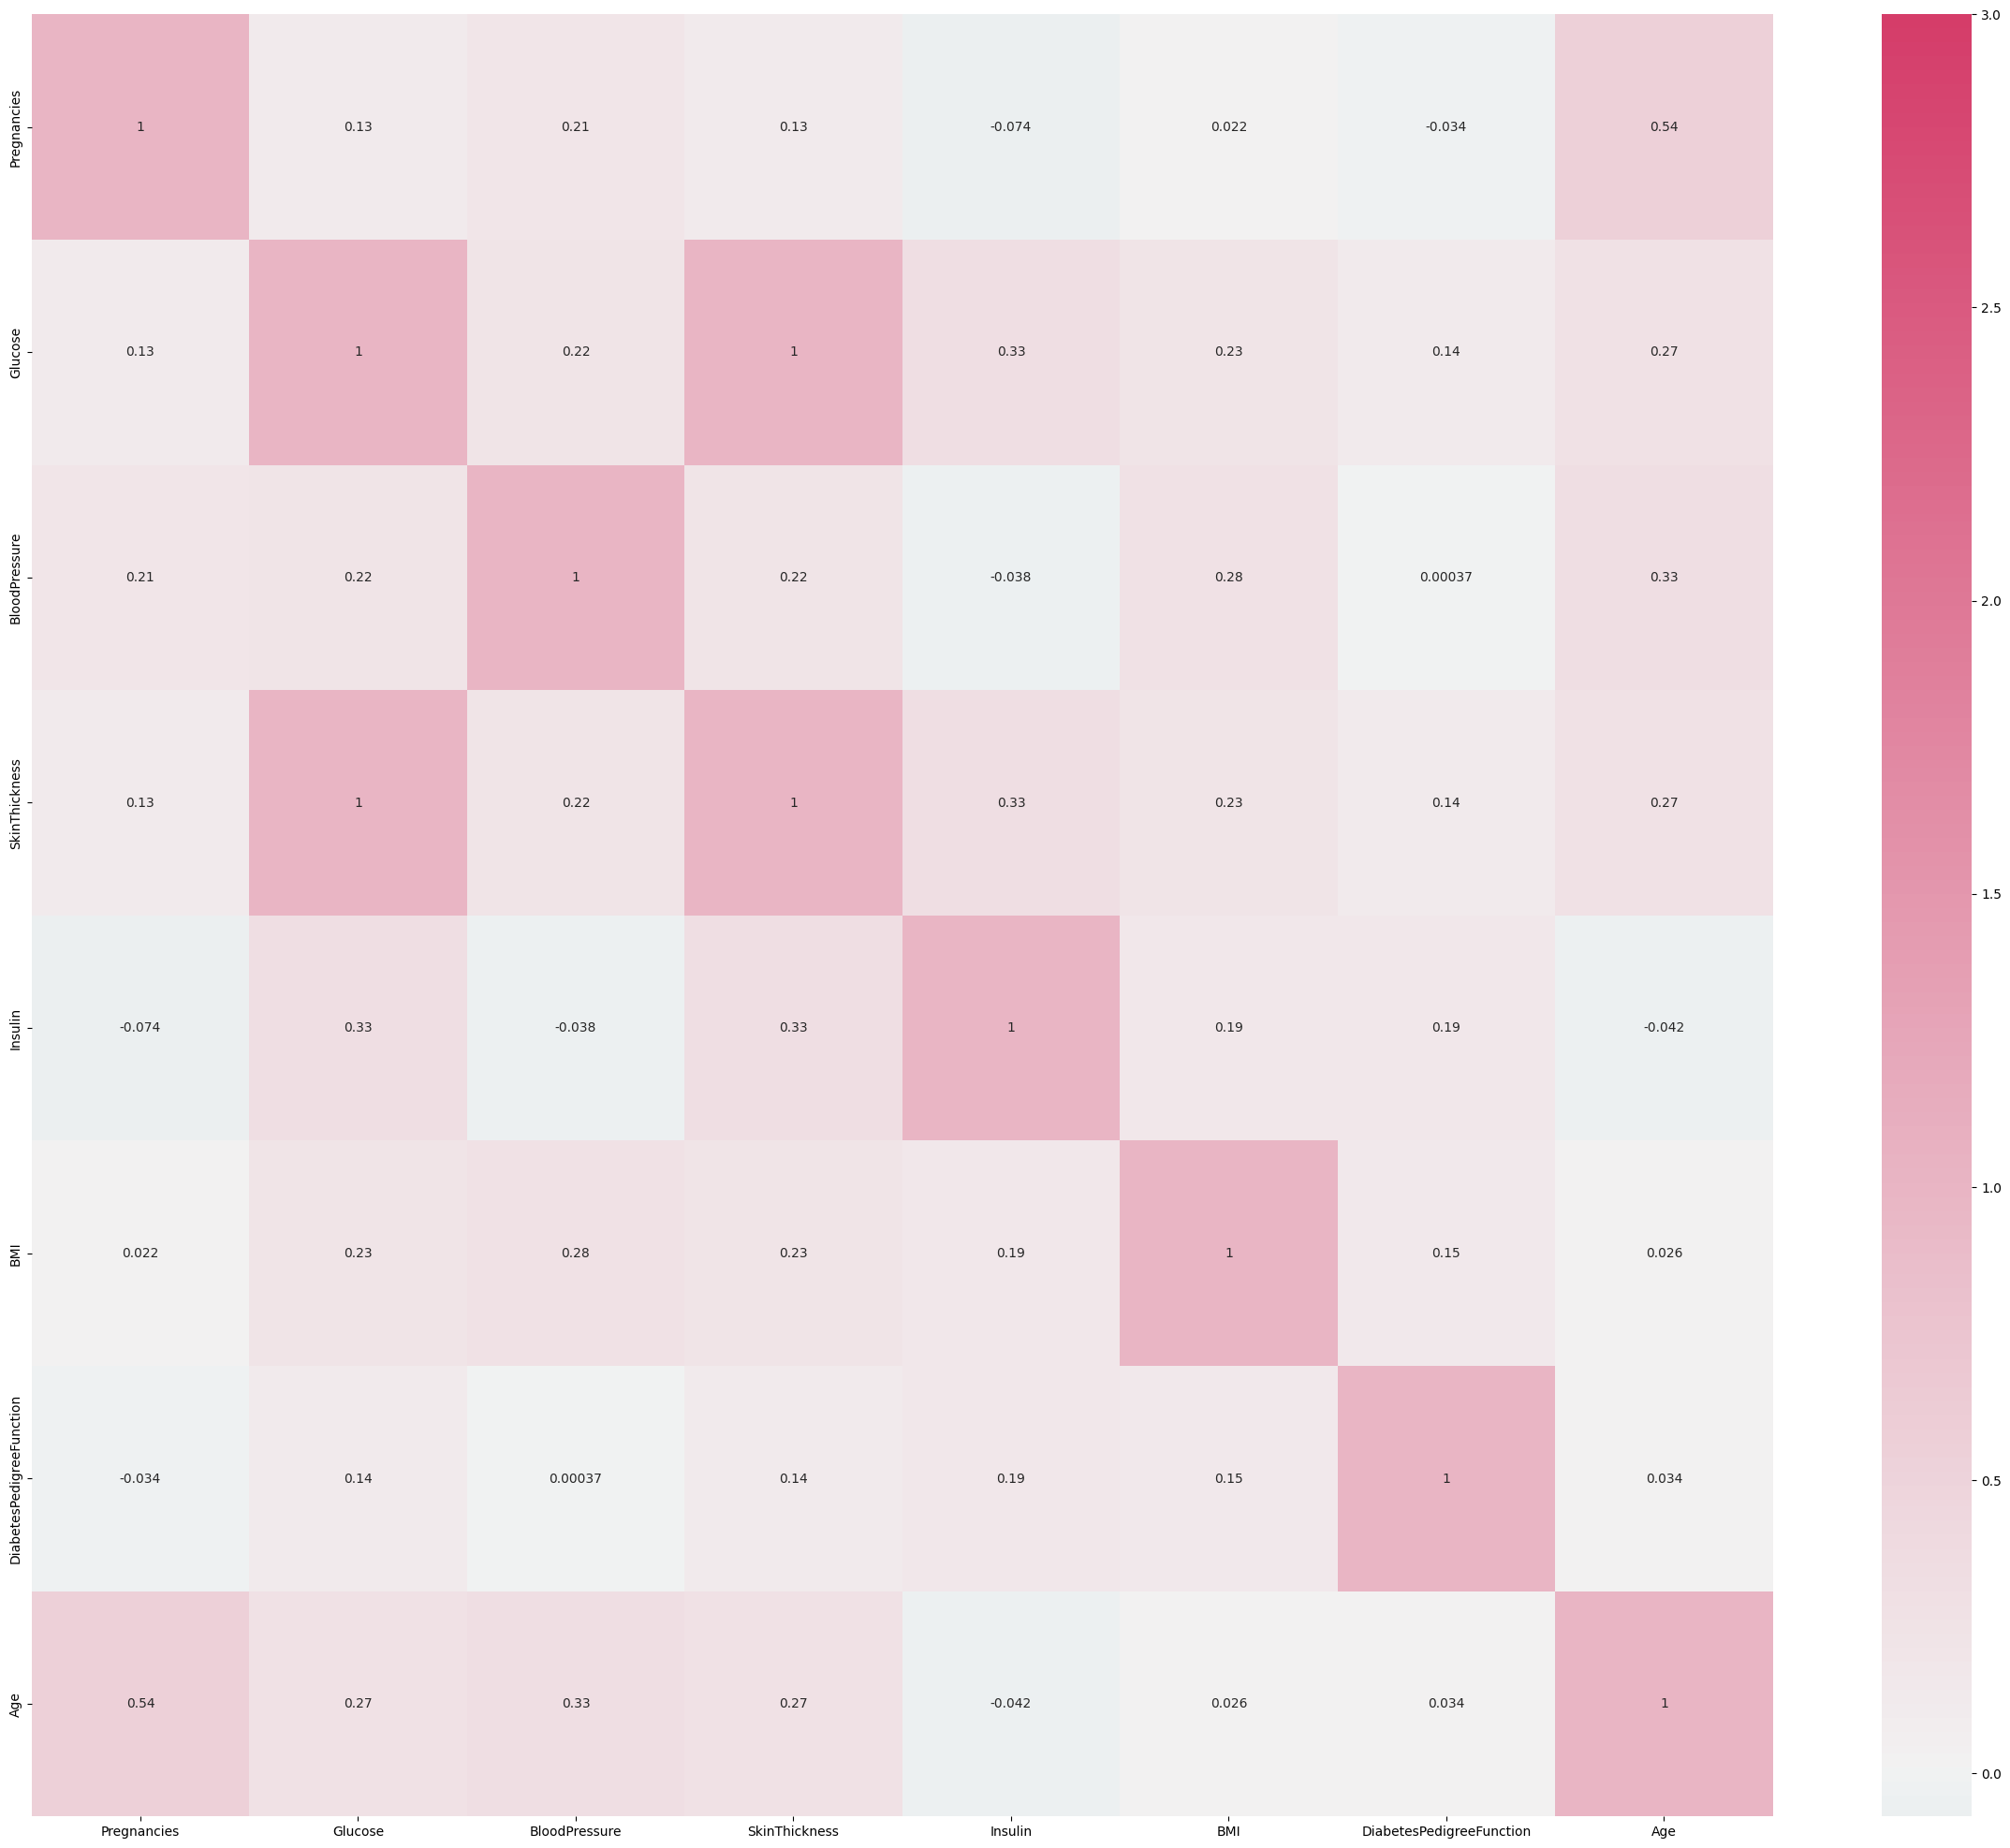

In [12]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (30,25))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(dataset.iloc[:,:-1].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

#### FEATURE ENGINEERING

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Scaling the Pregnancy Values
pregnancy_scaler = MinMaxScaler()
dataset['Pregnancies'] = pregnancy_scaler.fit_transform(dataset['Pregnancies'].values.reshape(-1,1))

#Scaling the Glucose Values
glucose_scaler = MinMaxScaler()
dataset['Glucose'] = glucose_scaler.fit_transform(dataset['Glucose'].values.reshape(-1,1))

#Scaling the Blood Pressure Values
bp_scaler = MinMaxScaler()
dataset['BloodPressure'] = bp_scaler.fit_transform(dataset['BloodPressure'].values.reshape(-1,1))

#Scaling the Skin Thickness Values
skin_scaler = MinMaxScaler()
dataset['SkinThickness'] = skin_scaler.fit_transform(dataset['SkinThickness'].values.reshape(-1,1))

#Scaling the Insulin Values
insulin_scaler = MinMaxScaler()
dataset['Insulin'] = insulin_scaler.fit_transform(dataset['Insulin'].values.reshape(-1,1))

#Scaling the BMI Values
bmi_scaler = StandardScaler()
dataset['BMI'] = bmi_scaler.fit_transform(dataset['BMI'].values.reshape(-1,1))

#Scaling the DiabetesPedigreeFunction Values
pedigree_function_scaler = MinMaxScaler()
dataset['DiabetesPedigreeFunction'] = pedigree_function_scaler.fit_transform(dataset['DiabetesPedigreeFunction'].values.reshape(-1,1))

#Scaling the Age Values
age_scaler = StandardScaler()
dataset['Age'] = age_scaler.fit_transform(dataset['Age'].values.reshape(-1,1))

In [14]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.670968,0.000000,0.167255,0.234415,1.425995,1
1,0.058824,0.264516,0.428571,0.264516,0.000000,-0.851535,0.116567,-0.190672,0
2,0.470588,0.896774,0.408163,0.896774,0.000000,-1.331821,0.253629,-0.105584,1
3,0.058824,0.290323,0.428571,0.290323,0.111111,-0.633222,0.038002,-1.041549,0
4,0.000000,0.600000,0.163265,0.600000,0.198582,1.549899,0.943638,-0.020496,1
5,0.294118,0.464516,0.510204,0.464516,0.000000,-0.997076,0.052519,-0.275760,0
6,0.176471,0.219355,0.265306,0.219355,0.104019,-0.211152,0.072588,-0.616111,1
7,0.588235,0.458065,0.460260,0.458065,0.000000,0.414676,0.023911,-0.360847,0
8,0.117647,0.987097,0.469388,0.987097,0.641844,-0.283923,0.034159,1.681259,1
9,0.470588,0.522581,0.734694,0.522581,0.000000,-0.066691,0.065756,1.766346,1


#### SPLITTING INTO THE X(FEATURES) AND Y(TARGET)

In [15]:
features = dataset.iloc[:,:-1].values
targets = dataset.iloc[:,-1].values

In [16]:
features

array([[ 0.35294118,  0.67096774,  0.48979592, ...,  0.16725546,
         0.23441503,  1.4259954 ],
       [ 0.05882353,  0.26451613,  0.42857143, ..., -0.85153454,
         0.11656704, -0.19067191],
       [ 0.47058824,  0.89677419,  0.40816327, ..., -1.33182125,
         0.25362938, -0.10558415],
       ...,
       [ 0.29411765,  0.49677419,  0.48979592, ..., -0.90975111,
         0.07130658, -0.27575966],
       [ 0.05882353,  0.52903226,  0.36734694, ..., -0.34213954,
         0.11571307,  1.17073215],
       [ 0.05882353,  0.31612903,  0.46938776, ..., -0.29847711,
         0.10119556, -0.87137393]])

In [17]:
targets

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

#### CREATING TRAINING AND TEST SETS

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features, targets, test_size = 0.25, shuffle = True)

In [19]:
print (" The shape of x_train is : " + str(x_train.shape))
print (" The shape of y_train is : " + str(y_train.shape))

 The shape of x_train is : (576, 8)
 The shape of y_train is : (576,)


#### CREATING A FUNCTION TO FIND THE OPTIMAL NEURAL NETWORK USING HYPERPARAMETER TUNING

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [21]:
def build_model(hp):

   model = keras.models.Sequential()

   model.add(keras.layers.Dense(units=hp.Int('dense_1_units',min_value=8,max_value=1024,step=4),activation=hp.Choice('dense_1_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_1_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

   #model.add(keras.layers.Dropout(rate=hp.Float('dropout_1_rate',min_value=0.1,max_value=0.9,step=0.05)))

   model.add(keras.layers.Dense(units=hp.Int('dense_2_units',min_value=8,max_value=1024,step=4),activation=hp.Choice('dense_2_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_2_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

   #model.add(keras.layers.Dropout(rate=hp.Float('dropout_2_rate',min_value=0.1,max_value=0.9,step=0.05)))

   model.add(keras.layers.Dense(units=hp.Int('dense_3_units',min_value=8,max_value=1024,step=4),activation=hp.Choice('dense_3_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_3_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

   #model.add(keras.layers.Dropout(rate=hp.Float('dropout_3_rate',min_value=0.1,max_value=0.9,step=0.05)))

   #model.add(keras.layers.Dense(units=hp.Int('dense_4_units',min_value=8,max_value=1024,step=4),activation=hp.Choice('dense_4_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_4_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

   model.add(keras.layers.Dense(1,activation='sigmoid'))

   model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3])),
                                          loss='binary_crossentropy',
                                          metrics=['accuracy'])

   return model

#### FINDING THE BEST FIT

In [22]:
from keras_tuner import RandomSearch

tuner_search = RandomSearch(build_model,objective='val_accuracy', max_trials = 500, directory='output', project_name="diabetes_prediction")

tuner_search.search(x_train, y_train,epochs = 5, validation_split=0.20)

Trial 500 Complete [00h 00m 04s]
val_accuracy: 0.767241358757019

Best val_accuracy So Far: 0.818965494632721
Total elapsed time: 00h 32m 13s


#### FINDING THE BEST MODEL AND BEST HYPERPARAMETERS

In [23]:
model = tuner_search.get_best_models(num_models=1)[0]
parameters=tuner_search.get_best_hyperparameters(1)[0]
print(parameters.values)

{'dense_1_units': 344, 'dense_1_activation': 'elu', 'dense_1_kernel_initializer': 'random_normal', 'dense_2_units': 120, 'dense_2_activation': 'elu', 'dense_2_kernel_initializer': 'random_normal', 'dense_3_units': 584, 'dense_3_activation': 'selu', 'dense_3_kernel_initializer': 'glorot_normal', 'learning_rate': 0.001}


#### SUBSTITUTING THE BEST FIT MODEL

In [24]:
diabetes_predictor = model

#### TRAINING AND VALIDATION

In [25]:
diabetes_predictor.fit(x_train, y_train, epochs = 95, validation_split = 0.2)

Epoch 1/95
15/15 [==============================] - 2s 23ms/step - loss: 0.4626 - accuracy: 0.7674 - val_loss: 0.4349 - val_accuracy: 0.8017
Epoch 2/95
15/15 [==============================] - 0s 8ms/step - loss: 0.4577 - accuracy: 0.7630 - val_loss: 0.4405 - val_accuracy: 0.7672
Epoch 3/95
15/15 [==============================] - 0s 9ms/step - loss: 0.4413 - accuracy: 0.7826 - val_loss: 0.4426 - val_accuracy: 0.7931
Epoch 4/95
15/15 [==============================] - 0s 8ms/step - loss: 0.4384 - accuracy: 0.7826 - val_loss: 0.4356 - val_accuracy: 0.8017
Epoch 5/95
15/15 [==============================] - 0s 9ms/step - loss: 0.4433 - accuracy: 0.7935 - val_loss: 0.4442 - val_accuracy: 0.7586
Epoch 6/95
15/15 [==============================] - 0s 9ms/step - loss: 0.4669 - accuracy: 0.7739 - val_loss: 0.4431 - val_accuracy: 0.7759
Epoch 7/95
15/15 [==============================] - 0s 10ms/step - loss: 0.4533 - accuracy: 0.7674 - val_loss: 0.4384 - val_accuracy: 0.7931
Epoch 8/95
15/15 [

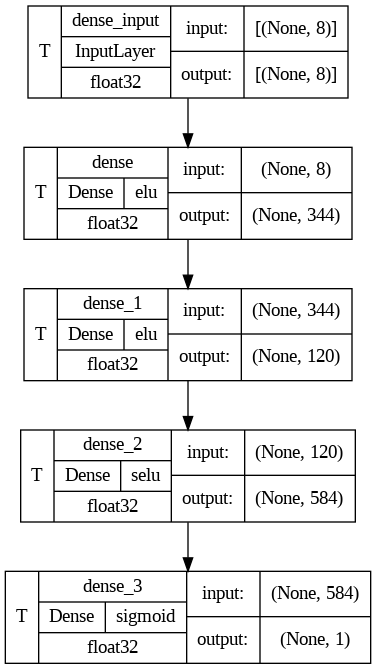

In [26]:
model_name='/content/drive/MyDrive/Colab Notebooks/Projects for Show/InternPe/Diabetes/diabetes_predictor.png'
keras.utils.plot_model(diabetes_predictor, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

#### TRAINING AND VALIDATION RESULTS

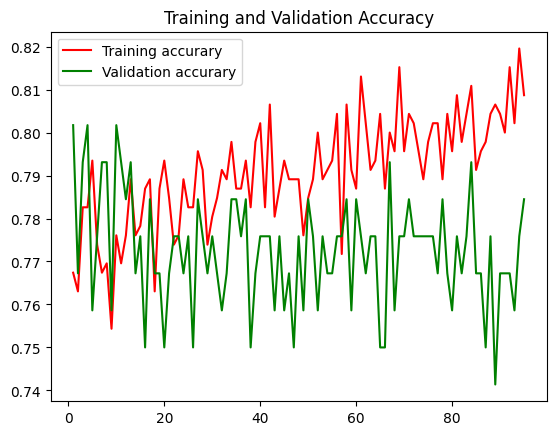

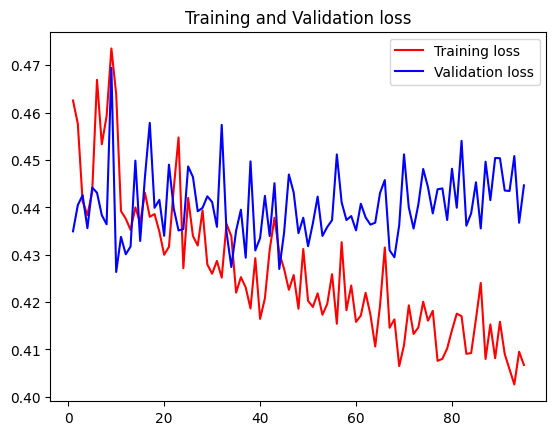

In [27]:
acc=diabetes_predictor.history.history['accuracy']
val_acc=diabetes_predictor.history.history['val_accuracy']
loss=diabetes_predictor.history.history['loss']
val_loss=diabetes_predictor.history.history['val_loss']
epochs=range(1,len(acc)+1)

import matplotlib.pyplot as plt

plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#### TEST SET IMPLEMENTATION

In [28]:
y_predict = diabetes_predictor.predict(x_test)
y_predict = (y_predict>0.5)

6/6 [==============================] - 0s 2ms/step


#### TEST SET RESULTS

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

print('The classification test results are : \n')
print(classification_report(y_test,y_predict))
print('Confusion Matrix :')
cm=confusion_matrix(y_test,y_predict)
print(cm)
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predict))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predict))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predict))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predict))*100)
print('\n')
print('The test ROC AUC percentage is :')
print(roc_auc_score(y_test,y_predict))

The classification test results are : 

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       133
           1       0.63      0.75      0.68        59

    accuracy                           0.79       192
   macro avg       0.75      0.78      0.76       192
weighted avg       0.80      0.79      0.79       192

Confusion Matrix :
[[107  26]
 [ 15  44]]


The test accuracy percentage is :
78.64583333333334


The test precision percentage is :
62.857142857142854


The test recall percentage is :
74.57627118644068


The test f1 percentage is :
68.21705426356588


The test ROC AUC percentage is :
0.7751369950299477


In [30]:
diabetes_predictor.predict([[0.352941,	0.670968,	-0.021044,	0.670968,	0.000000,	0.167255,	0.234415,	1.425995]])

1/1 [==============================] - 0s 76ms/step


array([[0.85876465]], dtype=float32)

#### SAVING THE MODEL

In [34]:
diabetes_predictor.save("/content/drive/MyDrive/Colab Notebooks/Projects for Show/InternPe/Diabetes/diabetes_predictor.h5")

#### CREATING A GRADIO BASED UI TO PREDICT DIABETES

In [32]:
model = keras.saving.load_model("/content/drive/MyDrive/Colab Notebooks/Projects for Show/InternPe/Diabetes/diabetes_predictor.h5")

In [33]:
def diabetes(pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, diabetespedigreefunction, age):
    #results =['The Person does not have Diabetes', 'The Person has Diabetes']
    pregnancies = pregnancy_scaler.transform([[pregnancies]])
    glucose = glucose_scaler.transform([[glucose]])
    bloodpressure = bp_scaler.transform([[bloodpressure]])
    skinthickness = skin_scaler.transform([[skinthickness]])
    insulin = insulin_scaler.transform([[insulin]])
    bmi = bmi_scaler.transform([[bmi]])
    diabetespedigreefunction = pedigree_function_scaler.transform([[diabetespedigreefunction]])
    age = age_scaler.transform([[age]])

    input_array = np.array([[pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, diabetespedigreefunction, age]])
    input_list = input_array.reshape(-1,8)
    output_value = model.predict(input_list)
    outcome = (output_value>0.5)

    output_value = np.array2string(output_value,precision = 2)
    output_value = output_value.replace('[[','')
    output_value = output_value.replace(']]','')

    if outcome > 0.5:
      return (output_value, str('The Person has Diabetes'))
    else:
      return (output_value, str('The Person does not have Diabetes'))

with gr.Blocks() as Diabetes_Predictor:
    pregnancies = gr.Textbox(label = "No. of previous Pregnancies")
    glucose = gr.Textbox(label = "Glucose Level")
    bloodpressure = gr.Textbox(label = "Blood Pressure Level")
    skinthickness = gr.Textbox(label = "Skin Thickness")
    insulin = gr.Textbox(label = "Applied Insulin Level")
    bmi = gr.Textbox(label = "BMI")
    diabetespedigreefunction = gr.Textbox(label = "Diabetes Pedigree Function")
    age = gr.Textbox(label = "Age")

    probability = gr.Textbox(label = "Probability of Diabetes")
    final = gr.Textbox(label = "Result")

    predict_btn = gr.Button("Predict ")
    predict_btn.click(fn = diabetes, inputs = [pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, diabetespedigreefunction, age], outputs = [probability, final], api_name="diabetes_predictor")

Diabetes_Predictor.launch(debug = True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://140b03db18f4bab02f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 19ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://140b03db18f4bab02f.gradio.live
